# Digital Audio Processing 1

Date: 2023/08/20

Audio data from [this site](http://floor13.sakura.ne.jp/book03/book03.html)

In [28]:
import numpy as np
from scipy.io.wavfile import read, write
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from IPython.display import Audio

%matplotlib inline

In [4]:
def plot_wave(fs, data, title, ylim=(-1,1), max=1.0):
    num = data.shape[0]
    time = np.linspace(0., num/fs, num)

    fig, ax = plt.subplots(figsize=(12,2))
    ax.plot(time, data/max)   # Normalization (16bit: 2**16 * 2)
    ax.set_title(title)
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(ylim)

In [5]:
Audio('data/guitar_A4.wav')

In [6]:
Audio('data/recorder_A4.wav')

## Wave Form

In [7]:
g_fs, g_data = read('data/guitar_A4.wav')
g_num = g_data.shape[0]
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(g_fs, g_num, g_num/g_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

In [8]:
r_fs, r_data = read('data/recorder_A4.wav')
r_num = r_data.shape[0]
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(r_fs, r_num, r_num/r_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

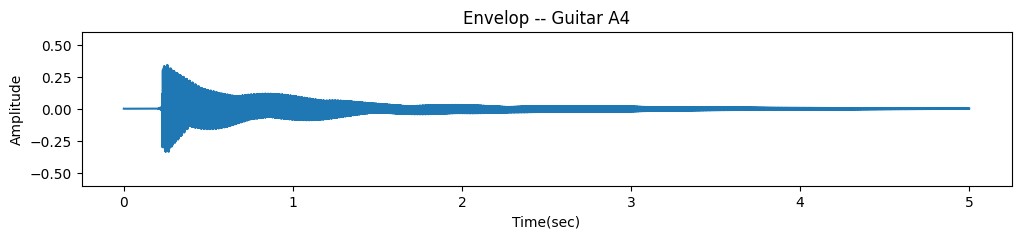

In [9]:
plot_wave(g_fs, g_data, 'Envelop -- Guitar A4', ylim=(-0.6, 0.6), max=2**15)

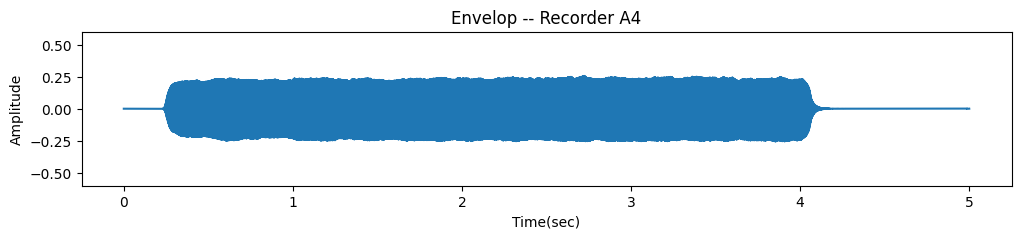

In [10]:
plot_wave(r_fs, r_data, 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

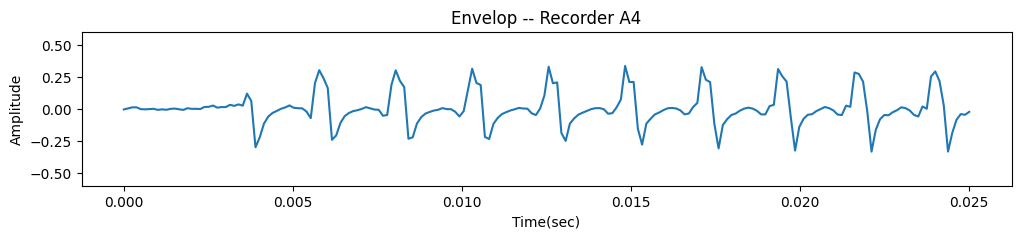

In [11]:
g_fs, g_data = read('data/guitar_A4.wav')
plot_wave(g_fs, g_data[1800:2000], 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

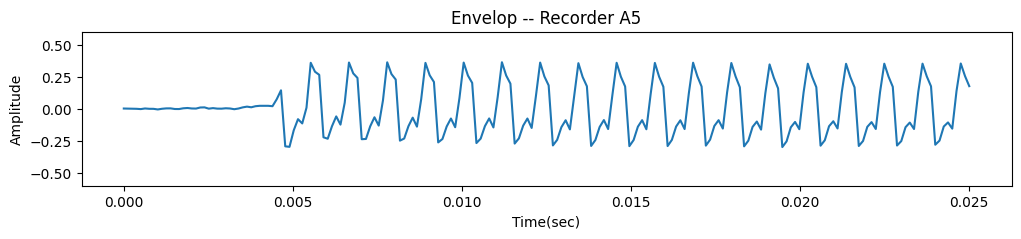

In [12]:
g_fs, g_data = read('data/guitar_A5.wav')
plot_wave(g_fs, g_data[1800:2000], 'Envelop -- Recorder A5', ylim=(-0.6, 0.6), max=2**15)

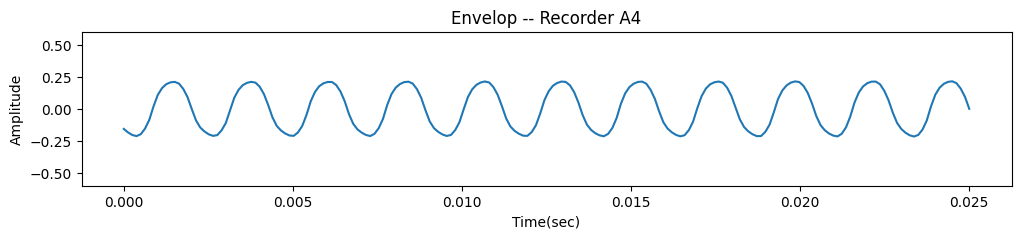

In [13]:
r_fs, r_data = read('data/recorder_A4.wav')
plot_wave(r_fs, r_data[2800:3000], 'Envelop -- Recorder A4', ylim=(-0.6, 0.6), max=2**15)

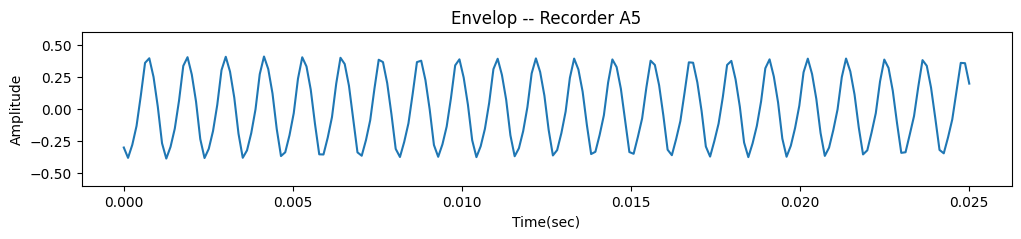

In [14]:
r_fs, r_data = read('data/recorder_A5.wav')
plot_wave(r_fs, r_data[2800:3000], 'Envelop -- Recorder A5', ylim=(-0.6, 0.6), max=2**15)

## Sine wave

In [15]:
class SineWave:

    def __init__(self, A, fs, f):
        self.A = A
        self.fs = fs
        self.f = f
        self.ff = 2 * np.pi * f / fs

    def wave(self, n):
        return np.array([self.A * np.sin(self.ff * i) for i in range(n)])

class CosineWave:

    def __init__(self, A, fs, f):
        self.A = A
        self.fs = fs
        self.f = f
        self.ff = 2 * np.pi * f / fs

    def wave(self, n):
        return np.array([self.A * np.cos(self.ff * i) for i in range(n)])

In [16]:
fs = 8000
num = int(fs * .1)  # 0.1 sec
A = 1
s = SineWave(A, fs, 440)
data = s.wave(num)

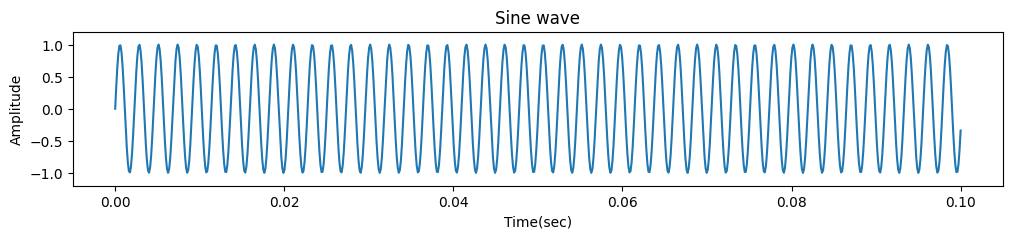

In [17]:
plot_wave(fs, data, 'Sine wave', ylim=(-A*1.2, A*1.2))

## Sawtooth Wave

$h_i = if_0 \; (i\geq2)$

$s(n) = A \, sin(\dfrac{2 \pi f_0 n}{f_s}) + \dfrac{A}{2} \, sin(\dfrac{2 \pi h_2 n}{f_s}) + \dfrac{A}{3} \, sin(\dfrac{2 \pi h_3 n}{f_s}) + \cdots + \dfrac{A}{i} \, sin(\dfrac{2 \pi h_i n}{f_s})$

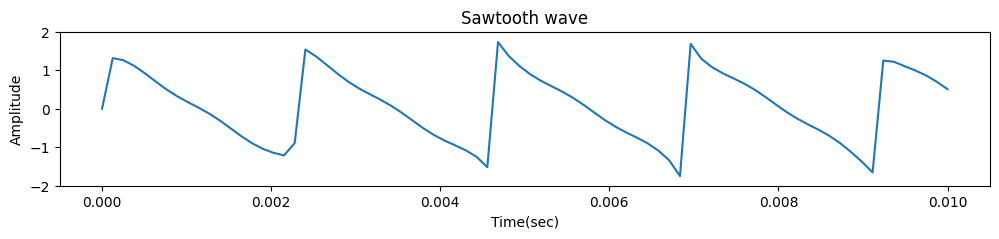

In [18]:
data = None

num = int(fs * 0.01)  # 0.01 sec

for i in range(1, 16):
    A = 1
    f = 440 * i
    s = SineWave(A*1/i, fs, f)
    if data is not None:
        data += s.wave(num)
    else:
        data = s.wave(num)

plot_wave(fs, data, 'Sawtooth wave', ylim=(-A*2, A*2))

In [19]:
data = None

num = int(fs * 2)  # 0.01 sec

for i in range(1, 16):
    A = 1
    f = 440 * i
    s = SineWave(A*1/i, fs, f)
    if data is not None:
        data += s.wave(num)
    else:
        data = s.wave(num)

Audio(data, rate=fs)

## Square Wave

$h_i = if_0 \; (i\geq2)$

$s(n) = A \, sin(\dfrac{2 \pi f_0 n}{f_s}) + \dfrac{A}{3} \, sin(\dfrac{2 \pi h_3 n}{f_s}) + \dfrac{A}{5} \, sin(\dfrac{2 \pi h_5 n}{f_s}) + \cdots + \dfrac{A}{i} \, sin(\dfrac{2 \pi h_i n}{f_s})$

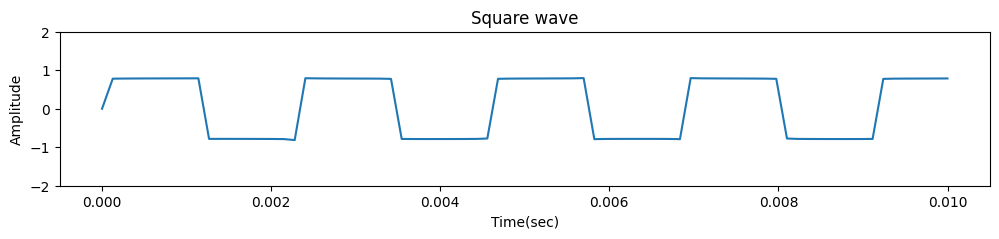

In [20]:
data = None

num = int(fs * 0.01)  # 0.01 sec

for i in range(1, 256, 2):
    A = 1
    f = 440 * i
    s = SineWave(A*1/i, fs, f)
    if data is not None:
        data += s.wave(num)
    else:
        data = s.wave(num)

plot_wave(fs, data, 'Square wave', ylim=(-A*2, A*2))

In [21]:
data = None

num = int(fs * 2)  # 2 sec

for i in range(1, 256, 2):
    A = 1
    f = 440 * i
    s = SineWave(A*1/i, fs, f)
    if data is not None:
        data += s.wave(num)
    else:
        data = s.wave(num)

Audio(data, rate=fs)

## Sawtooth Wave

$h_i = if_0 \; (i\geq2)$

$s(n) = A \, cos(\dfrac{2 \pi f_0 n}{f_s}) + \dfrac{A}{2} \, cos(\dfrac{2 \pi h_2 n}{f_s}) + \dfrac{A}{3} \, cos(\dfrac{2 \pi h_3 n}{f_s}) + \cdots + \dfrac{A}{i} \, cos(\dfrac{2 \pi h_i n}{f_s})$

In [34]:
data_s = None
data_c = None

num = int(fs * 2)  # 0.01 sec

for i in range(1, 16):
    A = 1
    f = 440 * i
    ss = SineWave(A*1/i, fs, f)
    cs = CosineWave(A*1/i, fs, f)
    
    if data_s is not None:
        data_s += ss.wave(num)
    else:
        data_s = ss.wave(num)
        
    if data_c is not None:
        data_c += cs.wave(num)
    else:
        data_c = cs.wave(num)

In [35]:
Audio(data_s, rate=fs)

In [36]:
Audio(data_c, rate=fs)